# 20기 Clustering 정규세션 과제

**데이터:** [Mall Customer Segmentation Data| Kaggle](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python)

---

## 0. 데이터 불러오기

In [16]:
import pandas as pd
df = pd.read_csv("Mall_Customers.csv", index_col = 0)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [19]:
df=df.reset_index()
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


## 1. Preprocssing / EDA

In [20]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [21]:
df.shape

(200, 5)

In [22]:
print(df['Gender'].value_counts())
print(len(df['Age'].value_counts()))

Female    112
Male       88
Name: Gender, dtype: int64
51


## 2. Clustering

In [23]:
from sklearn.cluster import KMeans

X = df.iloc[:, [3,4]].values
model = KMeans(n_clusters= 5, init = 'k-means++', random_state = 13)
cluster = model.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


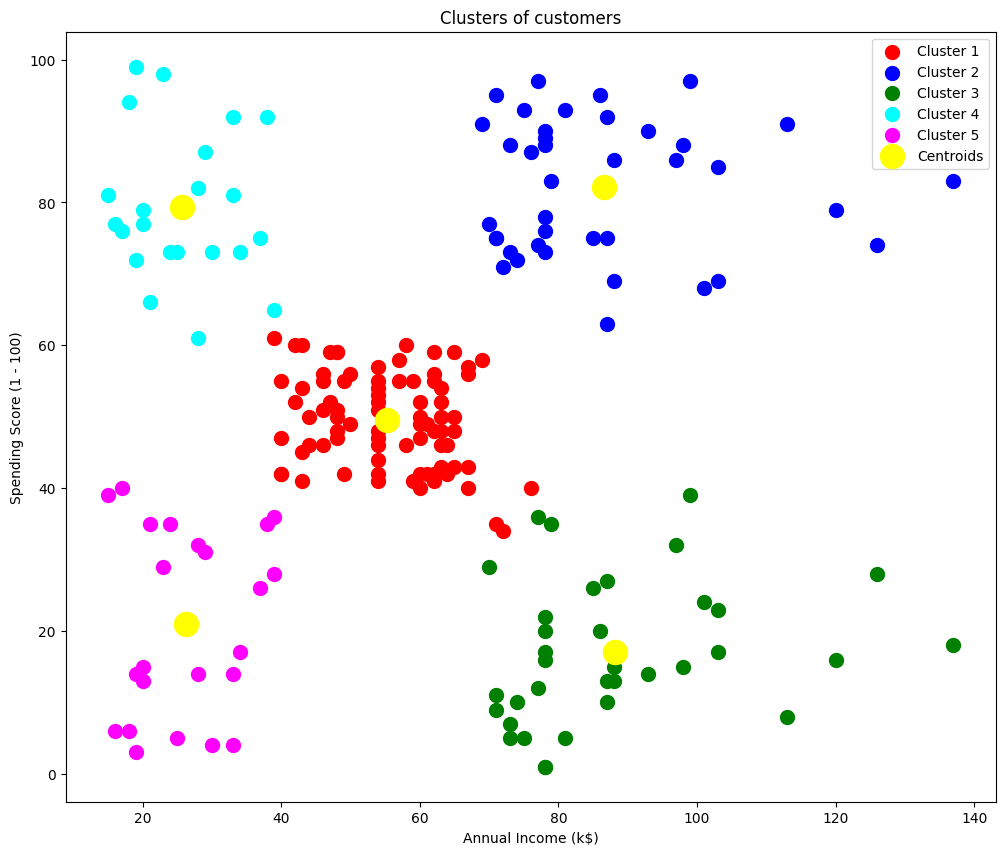

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
plt.scatter(X[cluster == 0, 0], X[cluster == 0, 1], s= 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[cluster == 1, 0], X[cluster == 1, 1], s= 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[cluster == 2, 0], X[cluster == 2, 1], s= 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[cluster == 3, 0], X[cluster == 3, 1], s= 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[cluster == 4, 0], X[cluster == 4, 1], s= 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1 - 100)')
plt.legend()
plt.show()

## 3. Evaluation

In [28]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X, cluster)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.553931997444648
